# 4.4 실습 2 - 보스턴 집 값 예측

* **분석데이터**: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html?highlight=boston#sklearn.datasets.load_boston

## 4.4.1 문제 정의 및 학습 데이터 준비

### 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

# 보스턴 집값 데이터 로드
boston = load_boston()
print(boston.DESCR)

"""
- CRIM     범죄율
- ZN       주거용 토지 비율
- INDUS    비소매업 비율
- CHAS     찰스강 근처 여부(근처:1, 근처아님:0)
- NOX      산화질소 농도
- RM       가구당 평균 방 수
- AGE      1940년 이전에 건축된 건물의 비율
- DIS      보스턴 고용 센터까지의 거리
- RAD      고속도로 접근성 지수
- TAX      재산세
- PTRATIO  학생-교사 비율
- B        흑인 비율
- LSTAT    인구 비율(%)
- MEDV     주택 가격의 중앙값(median)
"""

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

'\n- CRIM     범죄율\n- ZN       주거용 토지 비율\n- INDUS    비소매업 비율\n- CHAS     찰스강 근처 여부(근처:1, 근처아님:0)\n- NOX      산화질소 농도\n- RM       가구당 평균 방 수\n- AGE      1940년 이전에 건축된 건물의 비율\n- DIS      보스턴 고용 센터까지의 거리\n- RAD      고속도로 접근성 지수\n- TAX      재산세\n- PTRATIO  학생-교사 비율\n- B        흑인 비율\n- LSTAT    인구 비율(%)\n- MEDV     주택 가격의 중앙값(median)\n'

In [3]:
# 데이터 프레임 변환 및 종속변수(y) 결정(boston.target)
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#데이터셋 구성 체크(dataframe.shape) : 로우 갯수, 컬럼(피쳐) 갯수
boston_df.shape

(506, 14)

In [5]:
# 결측값 확인
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [6]:
# 중복값 확인 ( 중복값 있으면 제거 )
boston_df.duplicated().sum()

0

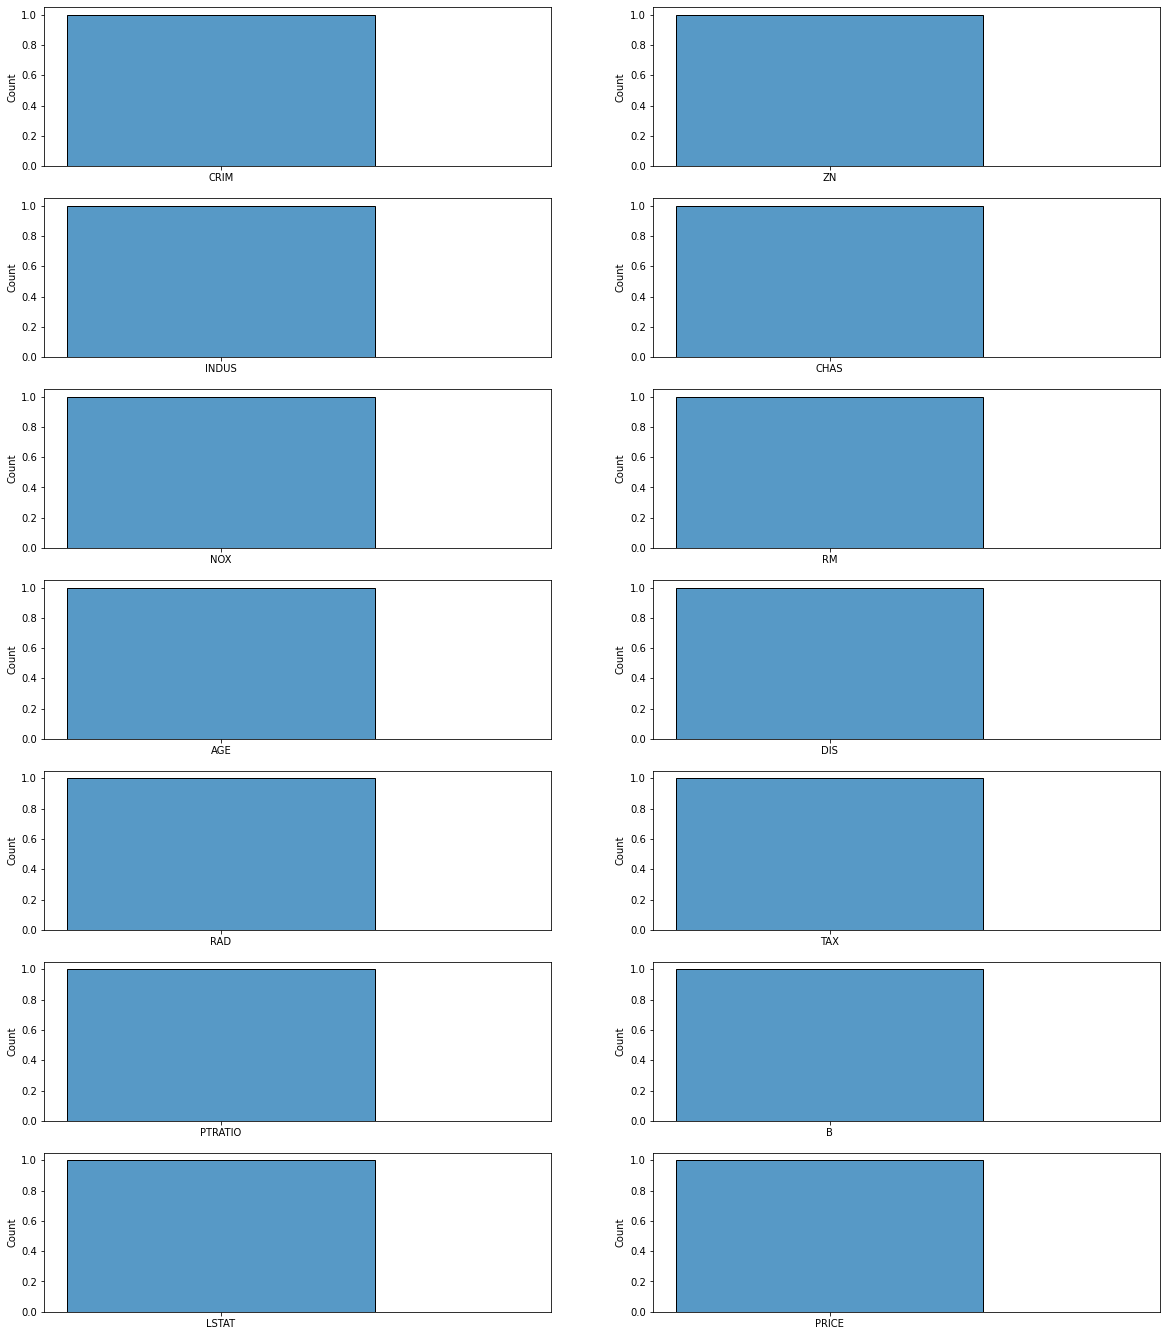

In [7]:
# 데이터 분포 확인 - 히스토그램(sns.histplot : subplot 이용해서 그려보시죠.)
nrows = 7
ncols = 2

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 24)

for i in range(nrows):
    for j in range(ncols):
        num = i * ncols + j
        sns.histplot(data=boston_df.columns[num], ax=axs[i][j])

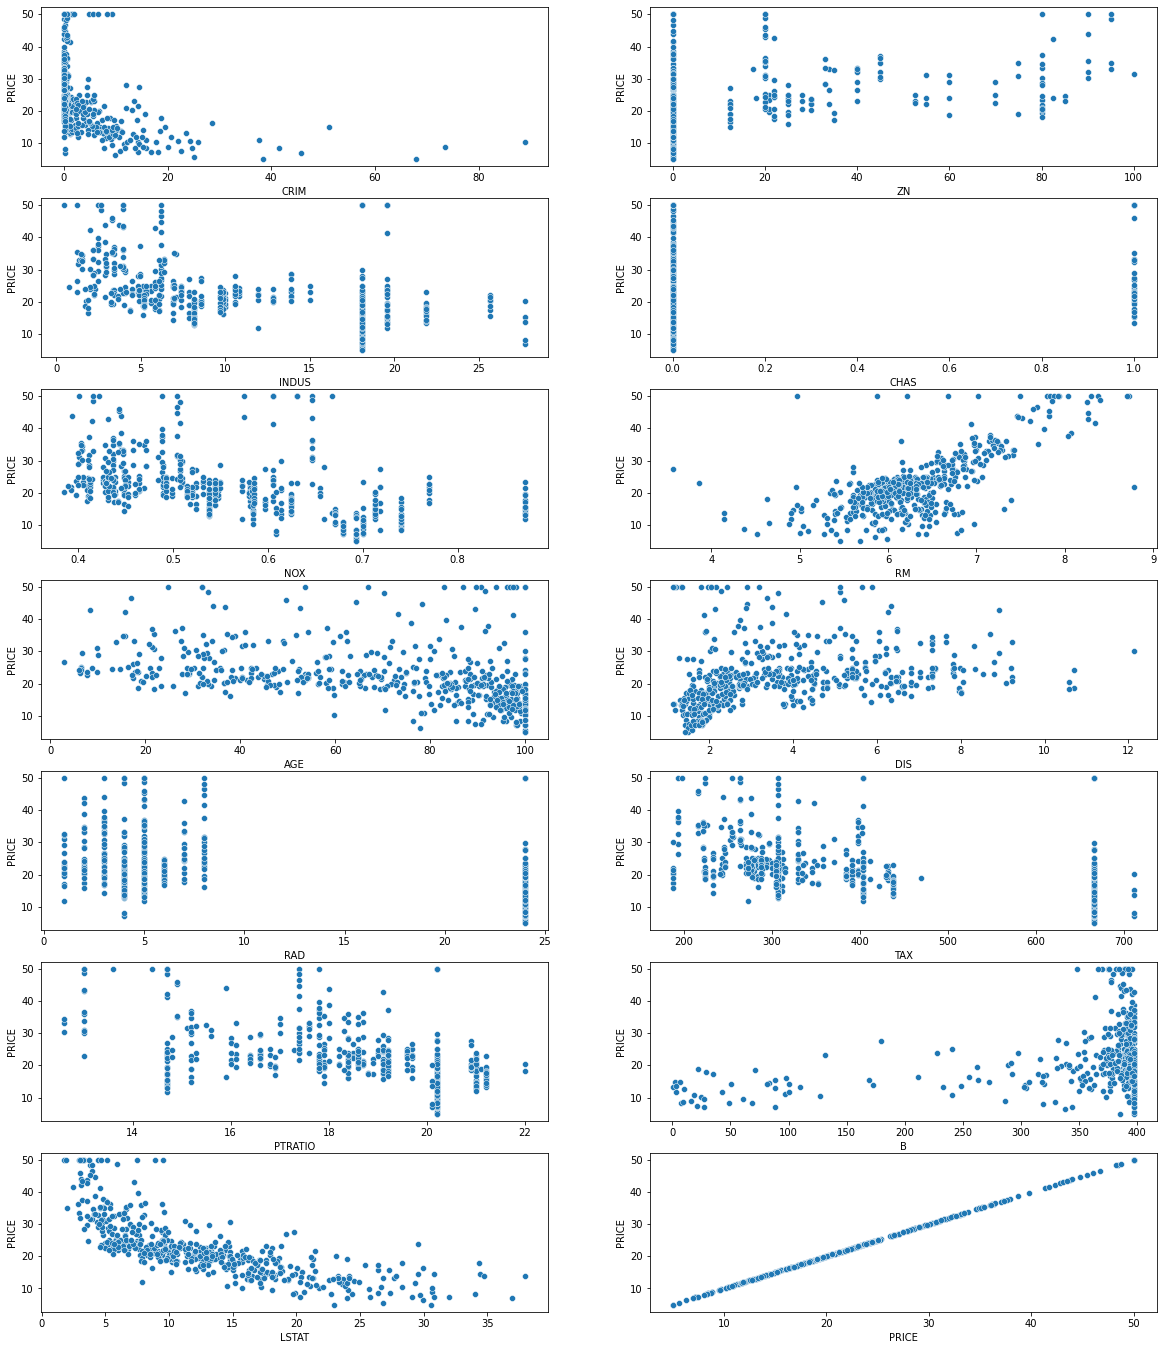

In [8]:
# 데이터 분포 확인 - 산점도 (sns.scatterplot : subplot이용 / 종속변수와 가장 상관관계가 높은 변수 시각적으로 체크)
nrows = 7
ncols = 2

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 24)

for i in range(nrows):
    for j in range(ncols):
        num = i * ncols + j
        sns.scatterplot(x=boston_df.columns[num], y='PRICE', data=boston_df, ax=axs[i][j])

In [9]:
# 데이터 분포 확인 - 변수 간 상관관계 ( dataframe.corr() : 각 컬럼의 상관계수 출력 )
# 참고 : 상관계수는 -1 ~ 1 사이의 값 ( 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계, 0은 아무런 관련성 없음 )

In [10]:
# 데이터 분포 확인 - 변수 간 상관관계(sns.heatmap 히트맵)
# 히트맵에서는 색이 밝을수록 양의 상관관계, 어두울수록 음의 상관관계

In [11]:
# Price 기준 상관관계 정렬

### 데이터분할

In [12]:
from sklearn.model_selection import train_test_split

# 데이터 분할

## 4.4.2 학습 - 선형회귀 모델

In [13]:
from sklearn.linear_model import LinearRegression

# 선형회귀모형 객체 선언 및 학습 

In [14]:
# coef : 선형회귀의 회귀계수 (어떤 변수가 가장 큰 가중치를 가지고 있는지 확인)
coef = pd.Series(data=np.round(lr_model.coef_, 1), index=X.columns )
coef

NameError: ignored

In [ ]:
# 위에서 도출한 coef 값을 막대그래프로 시각화 (sns.barplot)

### 평가

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 평가 ( MSE, RMSE, R2 score 도출 )

In [ ]:
# 실제값(y_test)과 모델결과값(y_pred)의 차이 정렬 및 출력해봄

## 4.4.3 학습 - 선형회귀모델 응용
### ① 독립변수 선택

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# 사이킷런 제공 SelectKBest 클래스 : 상관관계가 높은 변수 k개 추출해줌
# f_regression : 사이킷런 제공 함수, 회귀모델에서 독립변수와 종속변수간 평가결과(F-value)를 반환
# 전진선택법 : k 값을 늘려가면서 최적의 모델을 찾는 방법
# 후진제거법 : k 값을 줄여가면서 최적의 모델을 찾는 방법
X_selected = SelectKBest(score_func = f_regression, k = 3)  
X_selected.fit_transform(X, y)
# X_selected.get_support() : 선택된 특성 인덱스(Boolean)
features = X.columns[X_selected.get_support()]   
print('features = {}'.format(features))

In [ ]:
# 위에서 만든 상관관계가 높은 변수만 독립변수로 해서 회귀모델 객체 재생성 및 데이터 분할, 학습, 예측
X_selected = boston_df[features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model2 = LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred = lr_model2.predict(X_test)
printRegressorResult(y_test, y_pred)

### ② 다항회귀(PolynomialFeatures)모델

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#다항회귀식의 차수 설정 및 모델 생성 
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
printRegressorResult(y_test, y_pred)   

### ③ 데이터 전처리(StandardScaler)

In [ ]:
# StandardScaler를 이용한 데이터 전처리 (평균0 으로 정규화)
from sklearn.preprocessing import StandardScaler
X_selected_scaled = StandardScaler().fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model3 = LinearRegression()
lr_model3.fit(X_train, y_train)

y_pred = lr_model3.predict(X_test)
printRegressorResult(y_test, y_pred)

In [ ]:
X_selected.columns

In [ ]:
# 데이터 분포 쏠림 현상 완화해보자. 
# 데이터 분포 확인 - 히스토그램
nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= y, data = y, kde=True, bins=30, ax=axs[3])

# skew() 값 : 0 기준으로 크면 좌측으로 쏠린 형태 / 음의 방향으로 크면 우측으로 쏠림
print(X_selected.skew())
print('\nPRICE: {0:.2f}'.format(y.skew()))

In [ ]:
# 데이터 분포 쏠림 현상 완화를 위해 로그를 취함 ( log1p() : 1을 더한 후 로그 취하는 함수 이용 )
X_selected['LSTAT'] = np.log1p(X_selected['LSTAT'])
y = np.log1p(y)

# 데이터 분포 확인 - 히스토그램
nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= y, data = y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\nPRICE: {0:.2f}'.format(y.skew()))

In [ ]:
# 분포 살짝 바꿨으니 다시 데이터셋 분할하여 모델 학습 및 평가해보자. 

### (Tip) 교차검증(cross_validate)

In [ ]:
from sklearn.model_selection import cross_validate

# cv: 3개의 train, test set fold 로 나누어 학습
scores = cross_validate(lr_model, X, y, scoring="neg_mean_squared_error", cv=3, return_train_score=True, return_estimator=True)
print('Scores', scores)

# MSE, RMSE, RMSE의 평균값 출력해보죠


## 4.4.4. 학습 -  의사결정나무 기반 회귀 모델

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 객체 생성 및 학습 


In [ ]:
from lightgbm import LGBMRegressor

# Boosting 계열 LGBMRegressor 객체 생성 및 학습 


In [ ]:
# 3개 모델 학습 및 평가(MSE, RMSE, R2Score)

In [ ]:
from lightgbm import LGBMRegressor

# Early Stopping 적용해봅시다. 
lgb_model2 = LGBMRegressor(n_estimators=100)
evals = [(X_train , y_train), (X_test, y_test)]
lgb_model2.fit(X_train, y_train, early_stopping_rounds=10, eval_set=evals)

# lgb_model2 모델 평가(MSE, RMSE, R2Score)

In [ ]:
# 위에서 l2 값은 학습 데이터셋과 검증용 데이터셋의 손실율
import lightgbm as lgb
lgb.plot_metric(lgb_model2)

In [ ]:
# 피쳐별 중요도 시각화 기능 제공 
lgb.plot_importance(lgb_model2)